In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy
from scipy.stats import ttest_ind
%matplotlib inline

In [3]:
# population and sample variables
pop1 = np.random.binomial(10, 0.2, 10000)
pop2 = np.random.binomial(10, 0.5, 10000)
sample1 = np.random.choice(pop1, 100, replace=True)
sample2 = np.random.choice(pop2, 100, replace=True)

Population 1 mean: 2.00
Population 1 standard deviation: 1.25
Population 2 mean: 5.03
Population 2 standard deviation: 1.59


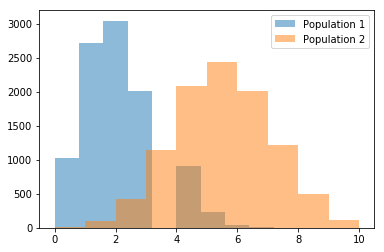

In [8]:
# Calculate the mean and standard deviation of both populations
pop1_mean = np.mean(pop1)
print("Population 1 mean: %.2f" %pop1_mean)
pop1_stdev = np.std(pop1)
print("Population 1 standard deviation: %.2f" %pop1_stdev)

pop2_mean = np.mean(pop2)
print("Population 2 mean: %.2f" %pop2_mean)
pop2_stdev = np.std(pop2)
print("Population 2 standard deviation: %.2f" %pop2_stdev)

#plot histogram
plt.hist(pop1, alpha=0.5, label='Population 1') 
plt.hist(pop2, alpha=0.5, label='Population 2') 
plt.legend(loc='upper right') 
plt.show()

Sample 1 mean: 2.08
Sample 1 standard deviation: 1.25
Sample 2 mean: 5.12
Sample 2 standard deviation: 1.61


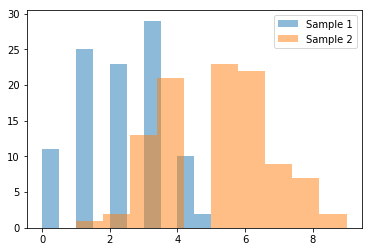

In [7]:
# Calculate the mean and standard deviation of both samples
sample1_mean = np.mean(sample1)
print("Sample 1 mean: %.2f" %sample1_mean)
sample1_stdev = np.std(sample1)
print("Sample 1 standard deviation: %.2f" %sample1_stdev)

sample2_mean = np.mean(sample2)
print("Sample 2 mean: %.2f" %sample2_mean)
sample2_stdev = np.std(sample2)
print("Sample 2 standard deviation: %.2f" %sample2_stdev)

#plot histogram
plt.hist(sample1, alpha=0.5, label='Sample 1') 
plt.hist(sample2, alpha=0.5, label='Sample 2') 
plt.legend(loc='upper right') 
plt.show()

    Increase sample size from 100 to 1000 and recalculate mean and std deviation as well as plot histogram. 
    
    I expect that the histogram will show the distributions behaving a bit more normal as n increases. At the very least they will start to look more like the population data that they are sampled from and the measures of central tendancy will begin to converge on the population characteristics.

Sample 1a mean: 2.00
Sample 1a standard deviation: 1.19
Sample 2a mean: 5.02
Sample 2a standard deviation: 1.55


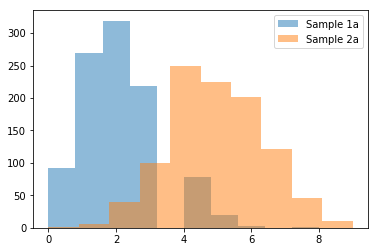

In [9]:
# increase sample size from 100 to 1000
sample1a = np.random.choice(pop1, 1000, replace=True)
sample2a = np.random.choice(pop2, 1000, replace=True)

# Calculate the mean and standard deviation of both samples
sample1a_mean = np.mean(sample1a)
print("Sample 1a mean: %.2f" %sample1a_mean)
sample1a_stdev = np.std(sample1a)
print("Sample 1a standard deviation: %.2f" %sample1a_stdev)

sample2a_mean = np.mean(sample2a)
print("Sample 2a mean: %.2f" %sample2a_mean)
sample2a_stdev = np.std(sample2a)
print("Sample 2a standard deviation: %.2f" %sample2a_stdev)

#plot histogram
plt.hist(sample1a, alpha=0.5, label='Sample 1a') 
plt.hist(sample2a, alpha=0.5, label='Sample 2a') 
plt.legend(loc='upper right') 
plt.show()

Decrease sample size from 100 to 20 and recalculate mean and std deviation as well as plot histogram. 

I expect that the histogram will show a more unclear version of the distribution. The histogram along with measures of central tendancy will diverge from the actual population data as the sample size decreases due to the lack of information used to create the estimates.

Sample 1b mean: 1.80
Sample 1b standard deviation: 0.93
Sample 2b mean: 5.05
Sample 2b standard deviation: 1.12


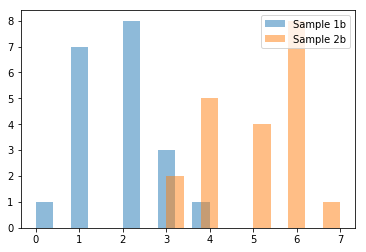

In [13]:
# decrease sample size from 100 to 20
sample1b = np.random.choice(pop1, 20, replace=True)
sample2b = np.random.choice(pop2, 20, replace=True)

# Calculate the mean and standard deviation of both samples
sample1b_mean = np.mean(sample1b)
print("Sample 1b mean: %.2f" %sample1b_mean)
sample1b_stdev = np.std(sample1b)
print("Sample 1b standard deviation: %.2f" %sample1b_stdev)

sample2b_mean = np.mean(sample2b)
print("Sample 2b mean: %.2f" %sample2b_mean)
sample2b_stdev = np.std(sample2b)
print("Sample 2b standard deviation: %.2f" %sample2b_stdev)

#plot histogram
plt.hist(sample1b, alpha=0.5, label='Sample 1b') 
plt.hist(sample2b, alpha=0.5, label='Sample 2b') 
plt.legend(loc='upper right') 
plt.show()

    Change population value for populations and take new samples. Compute t-stat and p-value.

In [14]:
# update population and sample variables
pop1a = np.random.binomial(10, 0.3, 10000)
sample1c = np.random.choice(pop1a, 100, replace=True)

Sample 1c mean: 3.07
Sample 1c standard deviation: 1.36


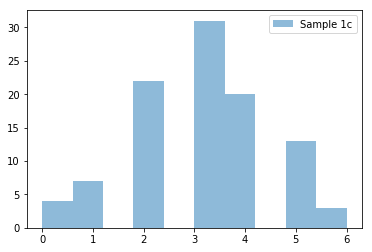

In [15]:
# Calculate the mean and standard deviation of sample
sample1c_mean = np.mean(sample1c)
print("Sample 1c mean: %.2f" %sample1c_mean)
sample1c_stdev = np.std(sample1c)
print("Sample 1c standard deviation: %.2f" %sample1c_stdev)

#plot histogram
plt.hist(sample1c, alpha=0.5, label='Sample 1c') 
plt.legend(loc='upper right') 
plt.show()

In [20]:
# sample1 => original population data, sample1c => updated population data
# t statistic and p value
diff = sample1.mean() - sample1c.mean()
print("Difference between sample means: %.2f" %diff)
size = np.array([len(sample1), len(sample1c)])
sd = np.array([sample1.std(), sample1c.std()])

# squared standard deviations are divided by the sample size and summed, then we take the square root of the sum
diff_se = (sum(sd**2/size))**0.5

# The difference between means divided by the standard error = T-value
print("t statistic: %.3f" %(diff/diff_se))

Difference between sample means: -0.99
t statistic: -5.370


In [22]:
# evaluate t-statistic and p-value using scipy.stats package
print(ttest_ind(sample1c, sample1, equal_var=False))

Ttest_indResult(statistic=5.343137816209846, pvalue=2.515457122416404e-07)


Change the population again by updating p to 0.4

In [23]:
# update population and sample variables
pop1b = np.random.binomial(10, 0.4, 10000)
sample1d = np.random.choice(pop1b, 100, replace=True)

Sample 1d mean: 3.89
Sample 1d standard deviation: 1.60


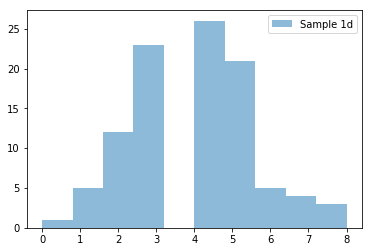

In [24]:
# Calculate the mean and standard deviation of sample
sample1d_mean = np.mean(sample1d)
print("Sample 1d mean: %.2f" %sample1d_mean)
sample1d_stdev = np.std(sample1d)
print("Sample 1d standard deviation: %.2f" %sample1d_stdev)

#plot histogram
plt.hist(sample1d, alpha=0.5, label='Sample 1d') 
plt.legend(loc='upper right') 
plt.show()

In [25]:
# sample1 => original population data, sample1d => updated population data
# t statistic and p value
diff1 = sample1.mean() - sample1d.mean()
print("Difference between sample means: %.2f" %diff1)
size1 = np.array([len(sample1), len(sample1d)])
sd1 = np.array([sample1.std(), sample1d.std()])

# squared standard deviations are divided by the sample size and summed, then we take the square root of the sum
diff_se1 = (sum(sd1**2/size1))**0.5

# The difference between means divided by the standard error = T-value
print("t statistic: %.3f" %(diff1/diff_se1))

Difference between sample means: -1.81
t statistic: -8.926


In [26]:
# evaluate t-statistic and p-value using scipy.stats package
print(ttest_ind(sample1d, sample1, equal_var=False))

Ttest_indResult(statistic=8.8816984679750668, pvalue=5.4227516904327974e-16)


### Results:
      The t statistic got larger when p = 0.4 and the pvalue dropped in size. If the pvalue is low it means that the difference of the means between the two populations is less likely to be caused by random chance. Thus, it means there is an actual difference between the means. This makes sense that the p-value should continue to drop as the difference of the p characteristic (probability of sucess) between distributions becomes larger in magnitude. (the difference between population characteristics becomes more obvious)

In [28]:
# different distribution population and sample variables
rayleigh1 = np.random.rayleigh(5, 10000)
rayleigh2 = np.random.rayleigh(3, 10000)
rayleigh_sample1 = np.random.choice(rayleigh1, 100, replace=True)
rayleigh_sample2 = np.random.choice(rayleigh2, 100, replace=True)

Population 1 mean: 6.22
Population 1 standard deviation: 3.27
Population 2 mean: 3.76
Population 2 standard deviation: 1.96


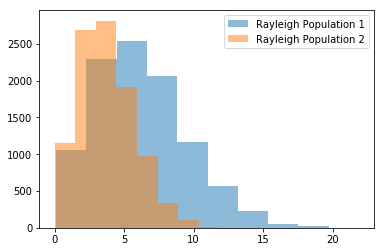

In [31]:
# Calculate the mean and standard deviation of both populations
rayleigh1_mean = np.mean(rayleigh1)
print("Population 1 mean: %.2f" %rayleigh1_mean)
rayleigh1_stdev = np.std(rayleigh1)
print("Population 1 standard deviation: %.2f" %rayleigh1_stdev)

rayleigh2_mean = np.mean(rayleigh2)
print("Population 2 mean: %.2f" %rayleigh2_mean)
rayleigh2_stdev = np.std(rayleigh2)
print("Population 2 standard deviation: %.2f" %rayleigh2_stdev)

#plot histogram
plt.hist(rayleigh1, alpha=0.5, label='Rayleigh Population 1') 
plt.hist(rayleigh2, alpha=0.5, label='Rayleigh Population 2') 
plt.legend(loc='upper right') 
plt.show()

Sample 1 mean: 7.15
Sample 1 standard deviation: 3.30
Sample 2 mean: 4.13
Sample 2 standard deviation: 1.89


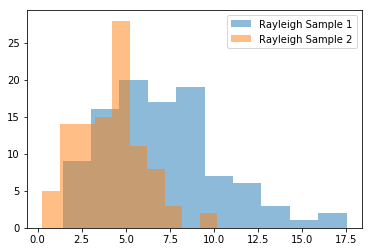

In [30]:
# Calculate the mean and standard deviation of both samples
rayleigh_sample1_mean = np.mean(rayleigh_sample1)
print("Sample 1 mean: %.2f" %rayleigh_sample1_mean)
rayleigh_sample1_stdev = np.std(rayleigh_sample1)
print("Sample 1 standard deviation: %.2f" %rayleigh_sample1_stdev)

rayleigh_sample2_mean = np.mean(rayleigh_sample2)
print("Sample 2 mean: %.2f" %rayleigh_sample2_mean)
rayleigh_sample2_stdev = np.std(rayleigh_sample2)
print("Sample 2 standard deviation: %.2f" %rayleigh_sample2_stdev)

#plot histogram
plt.hist(rayleigh_sample1, alpha=0.5, label='Rayleigh Sample 1') 
plt.hist(rayleigh_sample2, alpha=0.5, label='Rayleigh Sample 2') 
plt.legend(loc='upper right') 
plt.show()

### Results:
      It looks like there is a bit more of a difference between the measures of central tendancy on the population versus the samples with the rayleigh distribution. However, as n increases in the sample set i am sure they will begin to converge.  Central limit theorm says that statistics should still work as long as the sample size is large enough no matter what distribution is chosen?

## How large is large enough??